# Armónicos Esféricos
Vamos a mostrar como graficar algunas propiedades de los armónicos esféricos y dejar info para operar con ellos.




In [8]:
%matplotlib inline
from sympy import *
import sympy.functions as sp
import numpy as np
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import animation, rc
from IPython.display import HTML
x, y, z = symbols('x y z')
#k, m, n = symbols('k m n', integer=True)
theta = Symbol("theta")
phi = Symbol("phi")

Usaremos los índices numéricos n y m para denotar el tipo de SH

In [9]:
n=5
m=4 # <= n

Esta es la expresión como función algebraica de uno de ellos. Con esta podemos tomar derivadas, integrar, etc. en forma simbólica.

In [10]:
sp.Ynm(n,m,theta,phi).expand(func=True)

3*sqrt(770)*exp(4*I*phi)*sin(theta)**4*cos(theta)/(32*sqrt(pi))

Esta es la función numérica propiamente dicha, para poder hacer gráficos o integrar numéricamente.

In [14]:
YY = lambdify((theta,phi), sp.Ynm(n,m,theta,phi).expand(func=True),"numpy")

Evaluamos la parte real.

In [16]:
YY(0.3,0.3).real

0.0038751128595023812

Ahora hacemos un gráfico de la parte real donde además de poner distancias usamos colores para ver cual es la parte negativa y cual la positiva,etc.

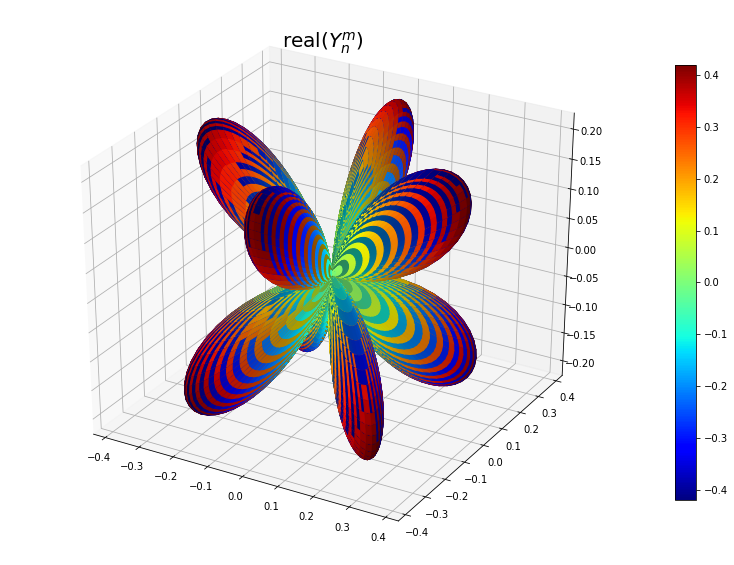

In [18]:
# Make data
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]

# graficamos la parte real
R = YY(THETA,PHI).real

X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

# Plot the surface

norm = colors.Normalize()
fig, ax = mpl.subplots(subplot_kw=dict(projection='3d'), figsize=(14,10))
m = cm.ScalarMappable(cmap=cm.jet)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)))
ax.set_title('real$(Y^m_n)$', fontsize=20)
m.set_array(R)
fig.colorbar(m, shrink=0.8);